In [1]:
import pybamm

In [2]:
model = pybamm.BaseModel()

In [3]:
L = pybamm.Variable('SEI thickness')
c = pybamm.Variable('Solvent concentration', domain = 'SEI layer')
k = pybamm.Parameter('Reaction rate')

def D(c):
    return pybamm.FunctionParameter('Diffusivity',c)

R = k * pybamm.BoundaryValue(c,'left')
N = - (1 / L) * D(c) * pybamm.grad(c)

In [4]:
model.rhs = {c: - (1 / L) * pybamm.div(N), L: R}

In [5]:
model.initial_conditions = {c: pybamm.Scalar(1), L: pybamm.Scalar(1)}

In [6]:
c_left = pybamm.BoundaryValue(c, 'left')
model.boundary_conditions = {c: {'left': (L * R / D(c_left), 'Neumann'), 'right': (1, 'Dirichlet')}}

In [7]:
model.variables = {'SEI thickness': L, 'Solvent concentration': c}

In [8]:
# using the model
x = pybamm.SpatialVariable('x', domain = 'SEI layer', coord_sys = 'cartesian')
geometry = {'SEI layer': {'primary': {x: {'min': pybamm.Scalar(0), 'max': pybamm.Scalar(1)}}}}

def Diffusion(c):
    return 1e-5 * c

param = pybamm.ParameterValues({'Reaction rate': 2, 'Diffusivity': Diffusion})

param.process_geometry(geometry)

In [9]:
param.process_model(model)

In [10]:
submesh_types = {'SEI layer': pybamm.Uniform1DSubMesh}
var_pts = {x: 100}
mesh = pybamm.Mesh(geometry, submesh_types, var_pts)

In [11]:
spatial_methods = {'SEI layer': pybamm.FiniteVolume}
disc = pybamm.Discretisation(mesh, spatial_methods)

In [12]:
disc.process_model(model)

In [21]:
solver = pybamm.ScipySolver()

In [22]:
import numpy as np

In [23]:
t = np.linspace(0,1,100)

In [24]:
solution = solver.solve(model, t)

In [26]:
L_out = pybamm.ProcessedVariable(model.variables['SEI thickness'], solution.t, solution.y)
c_out = pybamm.ProcessedVariable(model.variables['Solvent concentration'], solution.t, solution.y, mesh)

In [27]:
import matplotlib.pyplot as plt

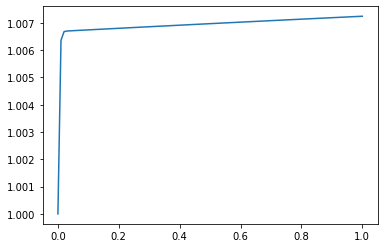

In [28]:
plt.plot(t, L_out(t))

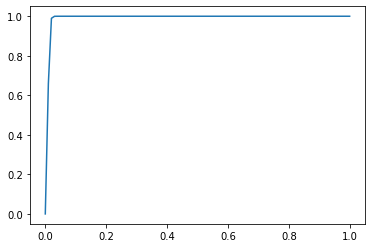

In [35]:
xx = np.linspace(0,1,100)
plt.plot(xx, c_out(0.5,xx))